# Regression by Machine Learning

Estimate surface pH as a function of T and S
linear regression
Neural network
Random forest

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sklearn

In [24]:
# load the data
ds_t=xr.open_dataset('Temperature_WOD_OSD_qc0_profiles.nc')
ds_s=xr.open_dataset('Salinity_WOD_OSD_qc0_profiles.nc')
ds_p=xr.open_dataset('pH_WOD_OSD_qc0_profiles.nc')

Text(0, 0.5, 'pH')

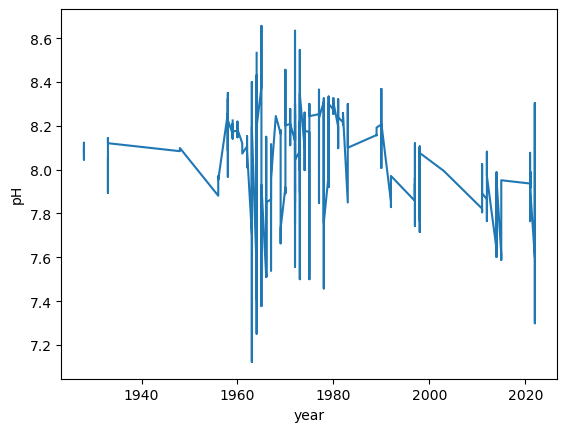

In [65]:
# Take the mean of pH across all latitudes and longitudes and depths for each month
pH_monthly_mean = ds_p['pH'].mean(dim=['depth'])

plt.plot(ds_p.year, pH_monthly_mean)
plt.xlabel('year')
plt.ylabel('pH')


In [60]:
print(pH_monthly_mean)

<xarray.DataArray 'pH' (profile: 3774)>
array([       nan,        nan,        nan, ..., 7.29902959, 8.00473664,
       8.30204628])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 6 ... 3768 3769 3770 3771 3772 3773


In [25]:
# read in near surface (0-50m) data
T = ds_t.Temperature[:,:11].mean('depth').to_numpy()
S = ds_s.Salinity[:,:11].mean('depth').to_numpy()
pH = ds_p.pH[:,:11].mean('depth').to_numpy()
# get the coordinates
lat = ds_p.lat.to_numpy()
lon = ds_p.lon.to_numpy()
year= ds_p.year.to_numpy()
month=ds_p.month.to_numpy()

In [26]:
print(ds_t.Temperature.values)

[[25.79999924 25.74839973 25.69759941 ...         nan         nan
          nan]
 [26.         25.96240044 25.92759895 ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 ...
 [27.1079998  27.10312271 26.97623634 ...         nan         nan
          nan]
 [25.97200012 25.97353172 25.97200012 ...         nan         nan
          nan]
 [27.26600075 27.2663517  27.2670002  ...         nan         nan
          nan]]


In [27]:
print(ds_s.Salinity.values)

[[35.47999954 35.47999954 35.47999954 ...         nan         nan
          nan]
 [35.59000015 35.59560013 35.60039902 ...         nan         nan
          nan]
 [35.59000015 35.59949875 35.61000061 ...         nan         nan
          nan]
 ...
 [33.63199997 33.63199997 33.65172195 ...         nan         nan
          nan]
 [36.39199829 36.39236069 36.39099884 ...         nan         nan
          nan]
 [35.88199997 35.88199997 35.88199997 ...         nan         nan
          nan]]


In [28]:
print(ds_p)

<xarray.Dataset>
Dimensions:  (profile: 3774, depth: 137)
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 6 ... 3768 3769 3770 3771 3772 3773
  * depth    (depth) float64 0.0 5.0 10.0 15.0 20.0 25.0 ... nan nan nan nan nan
Data variables:
    pH       (profile, depth) float64 ...
    year     (profile) int32 1914 1914 1914 1928 1928 ... 2022 2022 2022 2022
    month    (profile) int32 2 3 4 10 10 10 10 3 3 ... 12 12 12 12 12 12 12 12
    lat      (profile) float64 17.72 17.72 17.72 14.77 ... 13.57 25.32 12.71
    lon      (profile) float64 -64.93 -64.93 -64.93 ... -97.32 -59.82 -60.66


Text(0.5, 1.0, 'input data locations')

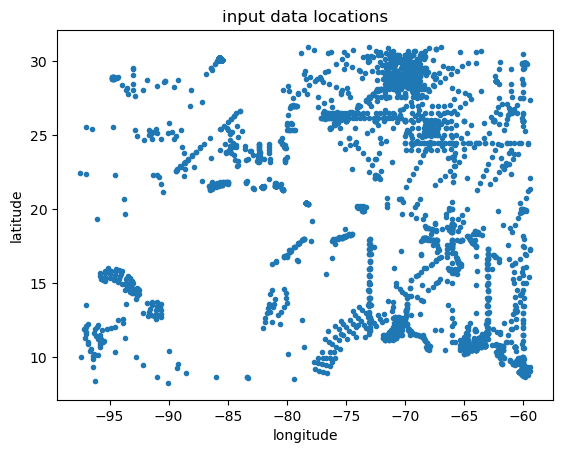

In [29]:
# assemble the input matrix
X=np.array([T,S,lat,lon,year,month]).T #transpose
y=np.array(pH).T
#
# first remove nan select data points 
dd = y + np.sum(X,axis=1)
ind=(np.isnan(dd)==False)&(lat>8)&(lat<31)&(lon>-97.9)&(lon<-59.3)&(year>1950)
# 
X=X[ind,:]
y=y[ind]
# plot the data distribution
plt.plot(lon[ind],lat[ind],'.')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('input data locations')

In [30]:
# normalize the input data
Xm=np.mean(X,axis=0)
Xstd=np.std(X,axis=0)
Xa=(X-Xm)/Xstd

# Split the data into training test

In [31]:
import sklearn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xa, y,random_state=1)

# Linear regression

In [33]:
# multiple linear regression
from sklearn import linear_model
LINreg = linear_model.LinearRegression()

In [34]:
LINreg.fit(X_train,y_train)
LINreg.score(X_test,y_test)

0.2787097745526328

0.16018829238039553


Text(0.5, 1.0, 'Linear regression')

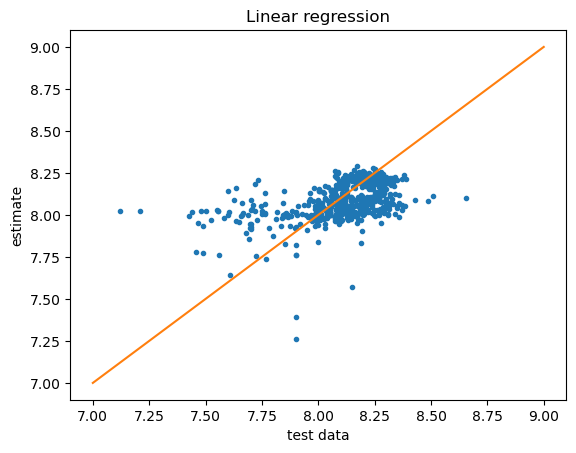

In [35]:
est = LINreg.predict(X_test)
plt.plot(y_test,est,'.')
plt.plot([7,9],[7,9],'-')
RMSE=np.sqrt(np.mean((y_test-est)**2))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Linear regression')

# Neural Network

In [36]:
from sklearn.neural_network import MLPRegressor
NNreg = MLPRegressor(hidden_layer_sizes=(20,20,20),random_state=1, max_iter=1000)

In [37]:
NNreg.fit(X_train, y_train)
NNreg.score(X_test,y_test)

0.3784781497703903

0.14869759657508763


Text(0.5, 1.0, 'Neural network')

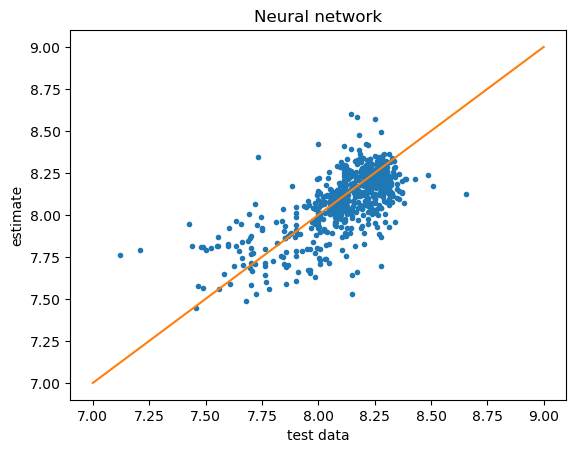

In [38]:
est = NNreg.predict(X_test)
plt.plot(y_test,est,'.')
plt.plot([7,9],[7,9],'-')
RMSE=np.sqrt(np.mean((y_test-est)**2))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Neural network')

# Random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=0)

In [40]:
RFreg.fit(X_train, y_train)
RFreg.score(X_test,y_test)

0.7547195576268945

0.09341297609763619


Text(0.5, 1.0, 'Random forest')

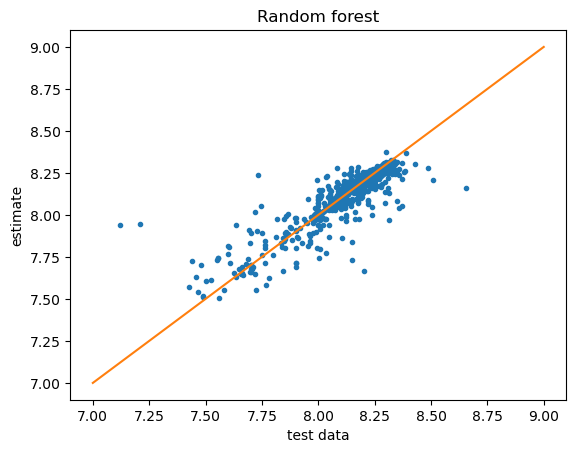

In [41]:
est = RFreg.predict(X_test)
plt.plot(y_test,est,'.')
plt.plot([7,9],[7,9],'-')
RMSE=np.sqrt(np.mean((y_test-est)**2))
print(RMSE)
plt.xlabel('test data')
plt.ylabel('estimate')
plt.title('Random forest')

In [42]:
#calculate pH from 1980-present and calculate linear trend for each grid cell
#time, lon, and lat- 
#make a map of pH for each year
#3 or 4 times slices

# projection using observed (T,S) data

- input is year, month, normalization for X, and regression method
- Projection is based on observationally derived EN4 (T,S) dataset

In [43]:
def project_tr(year,month,Xm,Xstd,reg):
    ds=xr.open_dataset('EN4_SST_SSS_G10_196501_201912.nc')
    T = ds.CT.sel(time=str(year)+'-'+str(month)).sel(lat=slice(8,31)).sel(lon=slice(-98,-59))
    S = ds.SA.sel(time=str(year)+'-'+str(month)).sel(lat=slice(8,31)).sel(lon=slice(-98,-59))
    P=np.shape(T.to_numpy())
    # generate input data
    T1=np.reshape(T.to_numpy(),[P[1]*P[2],1]) 
    S1=np.reshape(S.to_numpy(),[P[1]*P[2],1])
    # coordinates
    x=ds.lon.sel(lon=slice(-98,-59)).to_numpy()
    y=ds.lat.sel(lat=slice(8,31)).to_numpy()
    xx,yy=np.meshgrid(x,y)
    x1=np.reshape(xx,[P[1]*P[2],1])
    y1=np.reshape(yy,[P[1]*P[2],1])
    yr1=np.ones((P[1]*P[2],1))*year
    mo1=np.ones((P[1]*P[2],1))*month
    # generate X array and its normalization
    X=np.array([T1,S1,y1,x1,yr1,mo1])
    # remove nan
    dd=np.sum(X,axis=0)
    ind=(np.isnan(dd)==False)
    Xa=(np.squeeze(X[:,ind]).T-Xm)/Xstd
    # project
    est = reg.predict(Xa)
    est = np.where(est<0,0,est)
    # remap 
    est1=np.nan*np.ones((P[1]*P[2],1))
    est1[ind]=est
    tr=np.reshape(est1,[P[1],P[2]])
    return x,y,tr

In [44]:
x,y,tr = project_tr(1985,1,Xm,Xstd,RFreg)

Text(0.5, 1.0, 'pH : 1985-1')

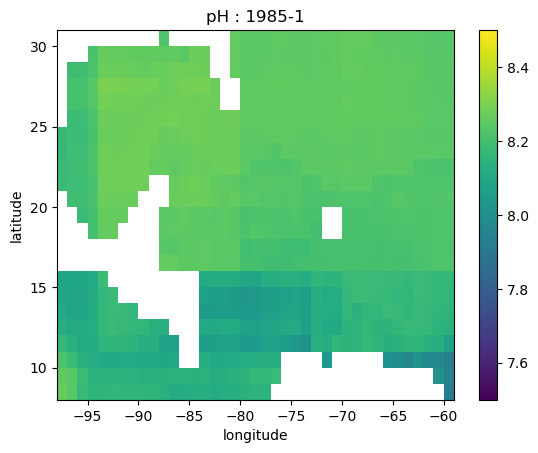

In [45]:
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 1985-1')

Text(0.5, 1.0, 'pH : 1965-01')

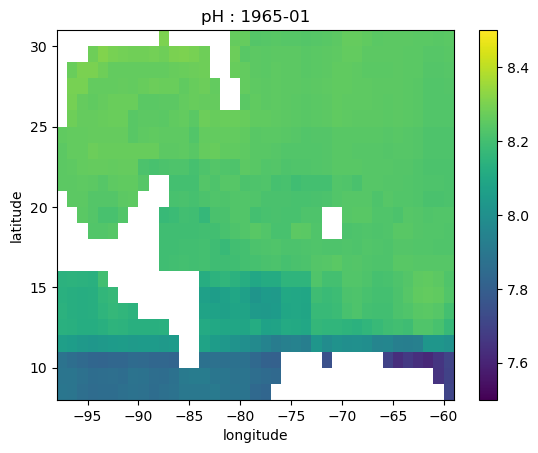

In [46]:
x,y,tr = project_tr(1965,1,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 1965-01')

Text(0.5, 1.0, 'pH : 2019-01')

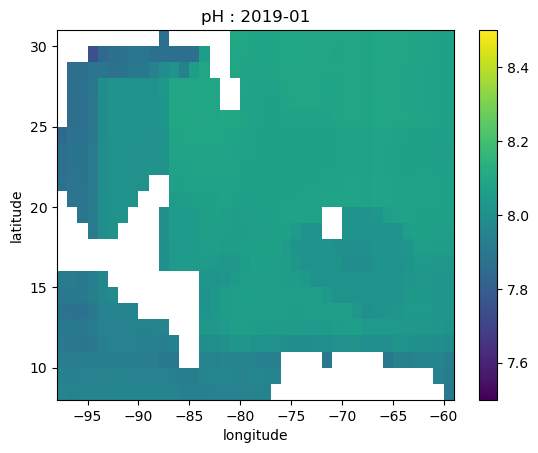

In [47]:
x,y,tr = project_tr(2019,1,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 2019-01')

Text(0.5, 1.0, 'pH : 2005-01')

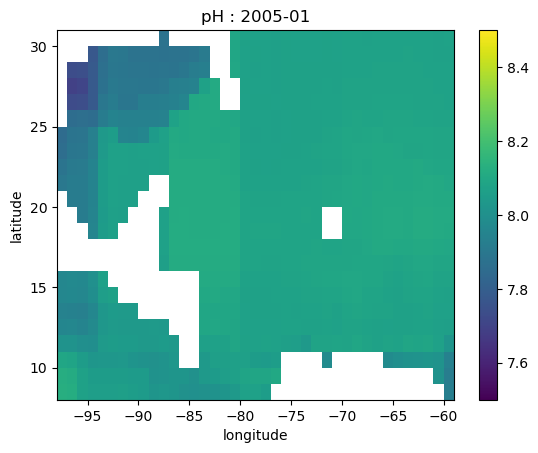

In [48]:
x,y,tr = project_tr(2005,1,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 2005-01')

Text(0.5, 1.0, 'pH : 1965-07')

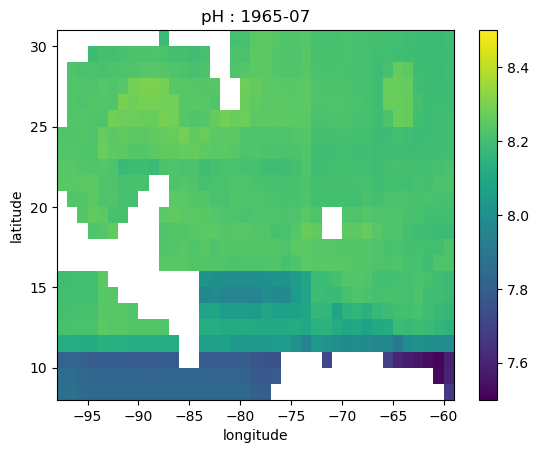

In [49]:
x,y,tr = project_tr(1965,7,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 1965-07')

Text(0.5, 1.0, 'pH : 1985-07')

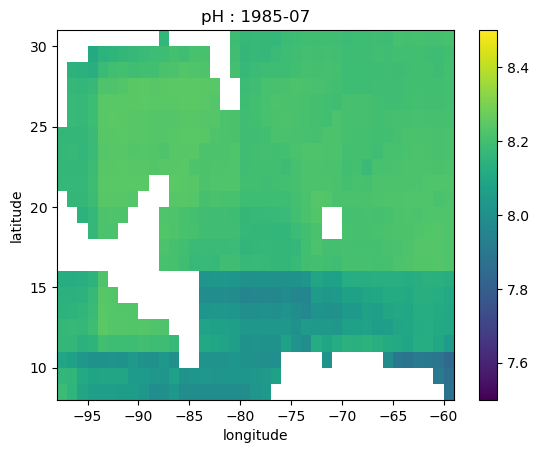

In [50]:
x,y,tr = project_tr(1985,7,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 1985-07')

Text(0.5, 1.0, 'pH : 2005-07')

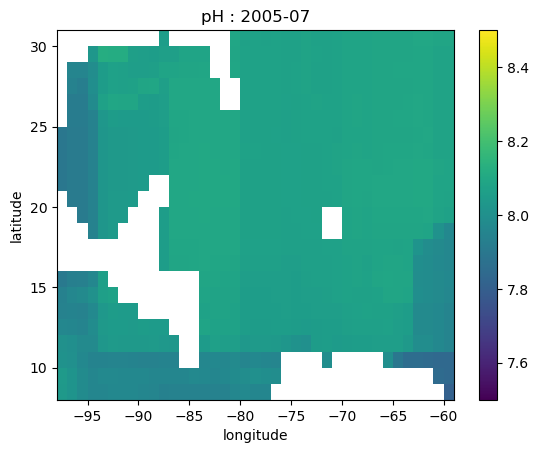

In [51]:
x,y,tr = project_tr(2005,7,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 2005-07')

Text(0.5, 1.0, 'pH : 2019-07')

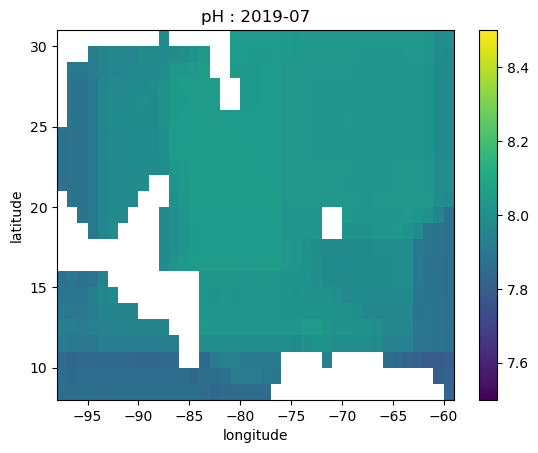

In [52]:
x,y,tr = project_tr(2019,7,Xm,Xstd,RFreg)
plt.pcolormesh(x,y,tr, vmin = 7.5, vmax = 8.5)
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('pH : 2019-07')